<a href="https://colab.research.google.com/github/leeEunJooo/NetworkAssociation/blob/master/packetperhour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Colab은 처음 시작 전 드라이브와 연결 해야함

In [32]:
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/졸업과제/modify.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,7,10,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 데이터 불러오기

In [33]:
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
data


,Unnamed: 0,l1,AP,AP.1,AP.2,AP.3,Client,Client.1,Client.2,Client.3,Client.4,Client.5,Client.6,Client.7,Client.8,Client.9,Client.10,Client.11,Client.12,Utilization,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Association Time,Association Time.1,Association Time.2,Association Time.3,Association Time.4,Association Time.5,Disassociation Time,Disassociation Time.1,Disassociation Time.2,Disassociation Time.3,Disassociation Time.4,Disassociation Time.5,Session Duration,Session Duration.1,Session Duration.2,Session Duration.3
0,0,l2,Name,MAC Address,IP Address,Map Location,IP Address,MAC Address,Radio Type,SSID,VLAN ID,Protocol,Policy Type,Type,Endpoint Type,Association ID,Authentication,Encryption Cipher,EAP Type,Avg. Session Throughput (Kbps),Bytes Sent,Bytes Received,Packets Sent,Packets Received,SNR (dB),RSSI (dBm),Data Retries,RTS Retries,year,month,day,hour,minute,second,year,month,day,hour,minute,second,days,hours,minutes,seconds
1,1,0,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.30,0,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,2.9,43908,67148,294,215,26,-52,601,0,2020,4,18,11,32,15,2020,4,18,11,37,16,0,0,5,1
2,2,1,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.24.103,1,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,"iPad11,3",1,Yes,CCMP (AES),TTLS,<0.1,0,0,0,0,2,-76,60,0,2020,4,13,16,8,19,2020,4,13,16,13,20,0,0,5,1
3,3,2,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.200,2,802.11b/g/n,eduroam,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,17,Yes,CCMP (AES),PEAP,46.1,877159,4333234,3410,4128,13,-69,9352,0,2020,2,10,14,46,48,2020,2,10,15,1,52,0,0,15,4
4,4,3,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,10.29.101.41,2,802.11a/n/ac,eduroam,17,802.11ac,WPA2,Unified Wireless,Linux-Workstation,94,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,22,-69,3,0,2020,2,11,19,32,13,2020,2,11,19,42,15,0,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186578,3186578,3186577,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,27,7,51,9,2019,6,27,8,1,11,0,0,10,2
3186579,3186579,3186578,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.248.255,28328,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,14.1,2336601,6946166,6205,7813,6,-83,2200,0,2019,6,12,10,12,1,2019,6,12,11,49,52,0,1,37,51
3186580,3186580,3186579,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.251.110,3830,802.11a/n/ac,PNU-WiFi,19,802.11ac,WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1715,0,2019,6,13,10,14,20,2019,6,13,10,19,30,0,0,5,10
3186581,3186581,3186580,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,13,10,14,21,2019,6,13,10,19,30,0,0,5,9


# 필요한 모듈과 데이터 보기

In [0]:
data['Disassociation Time.6'] = data[['Disassociation Time','Disassociation Time.1','Disassociation Time.2','Disassociation Time.3','Disassociation Time.4','Disassociation Time.5']].apply(lambda x : '-'.join(str(v) for v in x), axis = 1)
data['Association Time.6'] = data[['Association Time','Association Time.1','Association Time.2','Association Time.3','Association Time.4','Association Time.5']].apply(lambda x : '-'.join(str(v) for v in x), axis = 1)

# Time 나누어져 있는거 합치기

In [35]:

data['Association Time.6'][1:] = data['Association Time.6'][1:].apply(lambda x : datetime.datetime.strptime(x,  '%Y-%m-%d-%H-%M-%S'))
data['Disassociation Time.6'][1:] = data['Disassociation Time.6'][1:].apply(lambda x : datetime.datetime.strptime(x,  '%Y-%m-%d-%H-%M-%S'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Time 합친걸 datetime 형식으로 바꾸기

In [36]:
data

,Unnamed: 0,l1,AP,AP.1,AP.2,AP.3,Client,Client.1,Client.2,Client.3,Client.4,Client.5,Client.6,Client.7,Client.8,Client.9,Client.10,Client.11,Client.12,Utilization,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Association Time,Association Time.1,Association Time.2,Association Time.3,Association Time.4,Association Time.5,Disassociation Time,Disassociation Time.1,Disassociation Time.2,Disassociation Time.3,Disassociation Time.4,Disassociation Time.5,Session Duration,Session Duration.1,Session Duration.2,Session Duration.3,Disassociation Time.6,Association Time.6
0,0,l2,Name,MAC Address,IP Address,Map Location,IP Address,MAC Address,Radio Type,SSID,VLAN ID,Protocol,Policy Type,Type,Endpoint Type,Association ID,Authentication,Encryption Cipher,EAP Type,Avg. Session Throughput (Kbps),Bytes Sent,Bytes Received,Packets Sent,Packets Received,SNR (dB),RSSI (dBm),Data Retries,RTS Retries,year,month,day,hour,minute,second,year,month,day,hour,minute,second,days,hours,minutes,seconds,year-month-day-hour-minute-second,year-month-day-hour-minute-second
1,1,0,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.30,0,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,2.9,43908,67148,294,215,26,-52,601,0,2020,4,18,11,32,15,2020,4,18,11,37,16,0,0,5,1,2020-04-18 11:37:16,2020-04-18 11:32:15
2,2,1,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.24.103,1,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,"iPad11,3",1,Yes,CCMP (AES),TTLS,<0.1,0,0,0,0,2,-76,60,0,2020,4,13,16,8,19,2020,4,13,16,13,20,0,0,5,1,2020-04-13 16:13:20,2020-04-13 16:08:19
3,3,2,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.200,2,802.11b/g/n,eduroam,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,17,Yes,CCMP (AES),PEAP,46.1,877159,4333234,3410,4128,13,-69,9352,0,2020,2,10,14,46,48,2020,2,10,15,1,52,0,0,15,4,2020-02-10 15:01:52,2020-02-10 14:46:48
4,4,3,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,10.29.101.41,2,802.11a/n/ac,eduroam,17,802.11ac,WPA2,Unified Wireless,Linux-Workstation,94,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,22,-69,3,0,2020,2,11,19,32,13,2020,2,11,19,42,15,0,0,10,2,2020-02-11 19:42:15,2020-02-11 19:32:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186578,3186578,3186577,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,27,7,51,9,2019,6,27,8,1,11,0,0,10,2,2019-06-27 08:01:11,2019-06-27 07:51:09
3186579,3186579,3186578,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.248.255,28328,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,14.1,2336601,6946166,6205,7813,6,-83,2200,0,2019,6,12,10,12,1,2019,6,12,11,49,52,0,1,37,51,2019-06-12 11:49:52,2019-06-12 10:12:01
3186580,3186580,3186579,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.251.110,3830,802.11a/n/ac,PNU-WiFi,19,802.11ac,WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1715,0,2019,6,13,10,14,20,2019,6,13,10,19,30,0,0,5,10,2019-06-13 10:19:30,2019-06-13 10:14:20
3186581,3186581,3186580,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,13,10,14,21,2019,6,13,10,19,30,0,0,5,9,2019-06-13 10:19:30,2019-06-13 10:14:21


In [0]:
left = min(data['Association Time.6'][1:])
right = max(data['Disassociation Time.6'][1:])

#처음 값과 마지막 값을 구하기, 0번 행이 year-month-day 처럼 string으로 들어가 있으므로 1행부터 시작

In [78]:
print(left, right)
start_time = datetime.datetime(2019, 5, 19, 0)
finish_time = datetime.datetime(2020, 5, 2, 23 )
ts_days = pd.date_range(start = start_time, end = finish_time, freq = 'H')
day_y = {}
i = 0
for a in ts_days:
  day_y[a] = 0
  if i < 5 :
    print(a)
    i += 1

2020-05-03 00:19:40 2020-05-02 23:01:26
2019-05-19 00:00:00
2019-05-19 01:00:00
2019-05-19 02:00:00
2019-05-19 03:00:00
2019-05-19 04:00:00


# 각 시간 별 사용자를 구하기 위해 dictionary로 표현

In [0]:
for a,b in zip(data['Association Time.6'][1:], data['Disassociation Time.6'][1:]) : 
  start = datetime.datetime(a.year,a.month,a.day,a.hour)
  while start < b :
    day_y[start] += 1
    start += timedelta(hours = 1)

#시간 별 사용자 구하기

In [80]:
i = 0
for a in day_y:
  if i > 6 : break
  print(a)
  i += 1

2019-05-19 00:00:00
2019-05-19 01:00:00
2019-05-19 02:00:00
2019-05-19 03:00:00
2019-05-19 04:00:00
2019-05-19 05:00:00
2019-05-19 06:00:00


In [0]:
while left <= right + timedelta(hours = 1) :
  x.append(left)
  left += timedelta(hours = 1)

#시간별 사용자

In [0]:

y = []
for a in day_y.keys() :
  y.append(day_y[a])

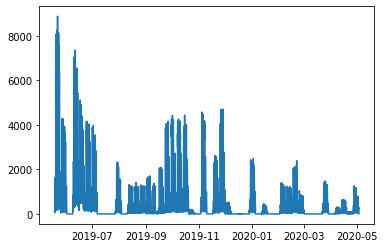

In [83]:
fig = plt.figure()
plt.plot(x, y)

# 대충 이용 시간대별 사용자 수